In [1]:
from fastai.text import *
import numpy as np
from sklearn.model_selection import train_test_split
import pickle
import sentencepiece as spm
import re
import pdb

In [2]:
import fastai, torch
fastai.__version__ , torch.__version__

('1.0.40', '1.0.0')

In [3]:
torch.cuda.set_device(0)

In [4]:
!ls

models
panjabi_classification_data.csv
Panjabi_Classification_Model-BBC_Panjabi_News_Data.ipynb
panjabi_classification_one_hot.csv
Punjabi_Binary_Classification.csv
tmp


In [5]:
path = Path('/home/gaurav/PycharmProjects/nlp-for-panjabi/classification')

In [6]:
df = pd.read_csv(path/'Punjabi_Binary_Classification.csv')
df.head()

,text,ਭਾਰਤੀ ਰਾਜਨੀਤੀ
0,ਪੰਜਾਬ ਵਿੱਚ ਕਾਂਗਰਸ ਨੂੰ 'ਆਪ' ਨਾਲ ਗਠਜੋੜ ਦੀ ਲੋੜ ਨ...,True
1,ਕਨ੍ਹਈਆ ਦੇ ਮੁਸਲਮਾਨ ਬਣਨ ਬਾਰੇ ਵਾਇਰਲ ਵੀਡੀਓ ਦਾ ਸੱਚ...,True
2,"ਮੋਦੀ ਨੇ ਗੁਰਦਾਸਪੁਰ ’ਚ ਕਿਹਾ, 'ਇੱਕ ਪਰਿਵਾਰ ਨੇ ’84...",True
3,'ਜਿੰਨ੍ਹਾਂ ਲੋਕਾਂ ਕੋਲ ਸਮਾਰਟ ਫੋਨ ਨਹੀਂ ਹਨ ਕੀ ਮੋਦੀ...,True
4,ਕੀ ਬਾਲੀਵੁੱਡ ਨੇ ਨਰਿੰਦਰ ਮੋਦੀ ਅੱਗੇ ਅਯੁੱਧਿਆ 'ਚ ਰਾ...,True


In [7]:
print('Positive Examples', df['ਭਾਰਤੀ ਰਾਜਨੀਤੀ'].sum())
print('Negative Examples', df.shape[0] -df['ਭਾਰਤੀ ਰਾਜਨੀਤੀ'].sum())

Positive Examples 114
Negative Examples 670


In [8]:
df['text'][0]

' ਪੰਜਾਬ ਵਿੱਚ ਕਾਂਗਰਸ ਨੂੰ \'ਆਪ\' ਨਾਲ ਗਠਜੋੜ ਦੀ ਲੋੜ ਨਹੀਂ - ਕੈਪਟਨ      7 ਜਨਵਰੀ 2019                                              ਈਮੇਲ                                                 ਸਾਂਝਾ ਕਰੋ                                                 ਈਮੇਲ  ਈਮੇਲ    ਲਿੰਕ ਨੂੰ ਕਾਪੀ ਕਰੋ  https://www.bbc.com/punjabi/india-46781799  ਸਾਂਝਾ ਕਰਨ ਬਾਰੇ ਹੋਰ ਪੜ੍ਹੋ   ਸਾਂਝਾ ਕਰਨ ਵਾਲੇ ਪੈਨਲ ਨੂੰ ਬੰਦ ਕਰੋ              Image copyright Pradeep Gaur/Mint via Getty Images  "ਸੂਬੇ ਵਿੱਚ ਆਮ ਆਦਮੀ ਪਾਰਟੀ ਦੀ ਕੋਈ ਹੋਂਦ ਨਹੀਂ ਹੈ ਇਸ ਲਈ ਉਸ ਨਾਲ ਸਮਝੌਤੇ ਦੀ ਕੋਈ ਲੋੜ ਨਹੀਂ ਹੈ। ਹਾਲਾਂਕਿ ਆਪ ਜਾਂ ਕਿਸੇ ਵੀ ਹੋਰ ਪਾਰਟੀ ਨਾਲ ਸਮਝੌਤੇ ਬਾਰੇ ਆਖ਼ਰੀ ਫੈਸਲਾ ਹਾਈ ਕਮਾਂਡ ਹੀ ਲਵੇਗੀ।"ਇਹ ਵਿਚਾਰ ਪੰਜਾਬ ਦੇ ਮੁੱਖ ਮੰਤਰੀ ਕੈਪਟਨ ਅਮਰਿੰਦਰ ਸਿੰਘ ਨੇ ਕਾਂਗਰਸ ਪ੍ਰਧਾਨ ਰਾਹੁਲ ਗਾਂਧੀ ਨਾਲ ਮੁਲਾਕਾਤ ਤੋਂ ਬਾਅਦ ਪੱਤਰਕਾਰਾਂ ਨਾਲ ਗੱਲਬਾਤ ਦੌਰਾਨ ਪ੍ਰਗਟ ਕੀਤੇ। ਉਨ੍ਹਾਂ ਕਿਹਾ ਕਿ ਰਾਹੁਲ ਗਾਂਧੀ ਨਾਲ ਹੋਈ ਮੀਟਿੰਗ ਵਿੱਚ ਆਪ ਨਾਲ ਗਠਜੋੜ ਬਾਰੇ ਚਰਚਾ ਨਹੀਂ ਹੋਈ ਹੈ।ਆਗਾਮੀ ਲੋਕ ਸਭਾ ਚੋਣਾਂ ਵਿੱਚ ਆਮ ਆਦਮੀ ਪਾਰਟੀ ਨਾਲ ਕਿਸੇ ਸਮਝੌਤੇ ਦੀ ਲੋੜ ਤੋਂ ਇਨਕਾਰ ਕੀਤਾ ਅਤੇ ਕਿਹਾ ਕਿ ਕਾਂਗਰਸ ਸੂਬੇ ਵਿੱਚ ਆਪਣੇ ਦਮ ’ਤੇ ਹੀ ਸਾਰੀਆਂ 13 ਸੀਟਾਂ ਜਿੱਤੇਗੀ।ਸੂਬੇ ਦੀਆਂ ਸਾਰੀਆਂ ਲੋਕ ਸਭਾ ਸੀਟਾਂ ’ਤੇ

In [9]:
df.shape

(784, 2)

In [10]:
df[df['text'].isnull()].shape

(0, 2)

In [11]:
label_cols = list(range(1,df.shape[1]))

In [12]:
print(label_cols)

[1]


In [13]:
id_to_col = list(df.columns)

In [14]:
col_to_id = {}
for i, col in enumerate(id_to_col):
    col_to_id[col] = i

In [15]:
class PanjabiTokenizer(BaseTokenizer):
    def __init__(self, lang:str):
        self.lang = lang
        self.sp = spm.SentencePieceProcessor()
        self.sp.Load(str('../tokenizer/panjabi_lm.model'))
        
    def tokenizer(self, t:str) -> List[str]:
        return self.sp.EncodeAsPieces(t)

In [16]:
sp = spm.SentencePieceProcessor()
sp.Load('../tokenizer/panjabi_lm.model')
itos = [sp.IdToPiece(int(i)) for i in range(30000)]

In [17]:
# 30,000 is the vocab size that we chose in sentencepiece
panjabi_vocab = Vocab(itos)

In [18]:
panjabi_tok = PanjabiTokenizer('pb')

In [19]:
tokenizer = Tokenizer(tok_func=PanjabiTokenizer, lang='pb')

In [20]:
tokenizer.special_cases

['xxunk', 'xxpad', 'xxbos', 'xxfld', 'xxmaj', 'xxup', 'xxrep', 'xxwrep']

In [21]:
data_lm = TextDataBunch.from_csv(path=path, csv_name='Punjabi_Binary_Classification.csv', valid_pct=0.2, text_cols=[0], label_cols=label_cols, tokenizer=tokenizer, vocab=panjabi_vocab)

In [22]:
data_lm.save()

In [23]:
bs=48

In [24]:
data_lm = TextLMDataBunch.load(path, 'tmp', bs=bs)

In [25]:
data_lm.show_batch()

idx,text
0,▁x x bo s ▁# t o o ▁ਦੀ ▁ਛਤਰ ੀ ▁ਹੇਠ ▁ਕਿਸ ▁ਦਾ ▁ਆਉਣਾ ▁ਹੈ ▁ ਖ਼ਤਰਨਾਕ ? ▁ਵਿਕਾਸ ▁ਤ੍ਰਿ ਵੇਦ ੀ ▁ਬੀਬੀਸੀ ▁ਪੱਤਰਕਾਰ ▁11 ▁ਅਕਤੂਬਰ ▁2018 ▁ਈਮੇਲ ▁ਸਾਂਝਾ ▁ਕਰੋ ▁ਈਮੇਲ ▁ਈਮੇਲ ▁ਲਿੰਕ ▁ਨੂੰ ▁ਕਾਪੀ ▁ਕਰੋ ▁http s : ▁/ ▁/ ▁w ww . bb c . com ▁/ ▁ punjabi ▁/ ▁ india - 458 2 07 20 ▁ਸਾਂਝਾ ▁ਕਰਨ ▁ਬਾਰੇ ▁ਹੋਰ ▁ਪੜ੍ਹ ੋ ▁ਸਾਂਝਾ ▁ਕਰਨ ▁ਵਾਲੇ
1,▁ਹੁੰਦੀ ▁ਹੈ । ▁ਮਰੀਜ਼ ▁ਵੱਡੀ ▁ਬਿਮਾਰੀ ▁ਬਾਰੇ ▁ਪੜ੍ਹ ▁ਕੇ ▁ਡਰ ▁ਜਾਂਦੇ ▁ਹਨ । ' ' ਇਹ ▁ਵੀ ▁ਪੜ੍ਹ ੋ : ਇੰਟ ਰਨ ੈੱਟ ▁' ਤੇ ▁ਪਿਆਰ ▁ਲੱਭਣ ▁ਲਈ ▁ਸਬ ਰ ▁ਜ਼ਰੂਰੀ ▁ਹੁਣ ▁ਘਰ ▁ਬੈਠੇ ▁ਕਰੋੜਾਂ ▁ਕਮਾ ▁ਰਹੇ ▁ਹਨ ▁ਨੌਜਵਾਨ ਕੀ ▁ਹੈ ▁ਚਾਈਲਡ ▁ਪੋਰਨ ? ▁ਆਪਣੇ ▁ਬੱਚੇ ▁ਲਈ ▁ਜ਼ਰੂਰ ▁ਪੜ੍ਹ ੋ ਉਹ ▁ਕਹਿੰਦੇ ▁ਹਨ ▁ਕਿ ▁ਇਸ ▁ਨਾਲ ▁ਦਿੱਕਤ ▁ਇਹ ▁ਹੁੰਦੀ ▁ਹੈ ▁ਕਿ ▁ਮਰੀਜ਼ ▁ਨੈਗੇਟਿਵ ▁ਖਿਆਲਾਂ ▁ਨਾਲ ▁ਭਰ ▁ਜਾਂਦਾ ▁ਹੈ । ▁ਉਸਦੇ
2,"ਅਕਾਲ ੀ ▁ਦਲ ▁ਟਕਸਾਲੀ ▁1920 ▁ਦੇ ▁ਅਕਾਲੀ ▁ਦੀਆਂ ▁ਭਾਵਨਾਵਾਂ ▁ਦੀ ▁ਤਰਜਮਾਨੀ ▁ਕਰੇਗਾ । ▁ਉਨ੍ਹਾਂ ▁ਨੇ ▁ਕਿਹਾ ▁ਕਿ ▁ਇਹ ▁ਸੰਗਠਨ ▁ਅਕਾਲ ▁ਤਖ਼ਤ ▁ਅਤੇ ▁ਪੰਥਕ ▁ਸੰਸਥਾਵਾਂ ▁ਦੀ ▁ਮਰ ਿਯਾ ਦਾ ▁ਤੇ ▁ਸਨਮਾਨ ▁ਬਹਾਲ ▁ਕਰੇਗਾ । ' ' ▁ਸਭ ▁ਰਸਤੇ ▁ਖੁੱਲ੍ਹੇ ▁ਬ੍ਰਹਮ ਪੁਰਾ ▁ਨੇ ▁ਕਿਹਾ , ▁"" ਬਾਦ ਲ ▁ਪਰਿਵਾਰ ▁ਨੇ ▁ਗਲਤੀਆਂ ▁ਨਹੀਂ ▁ਪਾਪ ▁ਕੀਤੇ ▁ਹਨ , ▁ਇਨ੍ਹਾਂ ▁ਦੀ ▁ਮਾਫ਼ੀ ▁ਆਪੇ ▁ਜਥੇਦਾਰ ▁ਥਾਪ ▁ਕੇ ▁ਨਹੀਂ ▁ਮਿਲ ▁ਸਕਦੀ । ▁ਅਕਾਲ ▁ਤਖ਼ਤ ▁ਉੱਤੇ ▁ਭੁੱਲ ਾਂ"
3,▁ਵੱਢ ਦੇ - ਸੁ ਸ਼ਮ ਾ ▁ਸਵਰਾਜ ▁30 ▁ਸਤੰਬਰ ▁2018 ▁ਈਮੇਲ ▁ਸਾਂਝਾ ▁ਕਰੋ ▁ਈਮੇਲ ▁ਈਮੇਲ ▁ਲਿੰਕ ▁ਨੂੰ ▁ਕਾਪੀ ▁ਕਰੋ ▁http s : ▁/ ▁/ ▁w ww . bb c . com ▁/ ▁ punjabi ▁/ ▁in tern ational - 45 69 26 57 ▁ਸਾਂਝਾ ▁ਕਰਨ ▁ਬਾਰੇ ▁ਹੋਰ ▁ਪੜ੍ਹ ੋ ▁ਸਾਂਝਾ ▁ਕਰਨ ▁ਵਾਲੇ ▁ਪੈਨਲ ▁ਨੂੰ ▁ਬੰਦ ▁ਕਰੋ ▁i m age ▁co py right ▁p id ▁ਫੋਟੋ ▁ਕੈਪ ਸ਼ਨ ▁ਪਾਕਿਸਤਾਨ
4,▁ਇਸਲਾਮਾਬਾਦ ▁29 ▁ਅਕਤੂਬਰ ▁2018 ▁ਈਮੇਲ ▁ਸਾਂਝਾ ▁ਕਰੋ ▁ਈਮੇਲ ▁ਈਮੇਲ ▁ਲਿੰਕ ▁ਨੂੰ ▁ਕਾਪੀ ▁ਕਰੋ ▁http s : ▁/ ▁/ ▁w ww . bb c . com ▁/ ▁ punjabi ▁/ ▁in tern ational -4 600 95 47 ▁ਸਾਂਝਾ ▁ਕਰਨ ▁ਬਾਰੇ ▁ਹੋਰ ▁ਪੜ੍ਹ ੋ ▁ਸਾਂਝਾ ▁ਕਰਨ ▁ਵਾਲੇ ▁ਪੈਨਲ ▁ਨੂੰ ▁ਬੰਦ ▁ਕਰੋ ▁i m age ▁co py right ▁p au l ▁k e n n ed y ▁/


In [26]:
learn = language_model_learner(data_lm, drop_mult=0.3)

In [27]:
# Loading the pretrained language model on panjabi wikipedia
learn.load(path/'../language-model/models/fourth', with_opt=True)

LanguageLearner(data=TextLMDataBunch;

Train: LabelList
y: LMLabel (627 items)
[Category 0, Category 0, Category 0, Category 0, Category 0]...
Path: /home/gaurav/PycharmProjects/nlp-for-panjabi/classification
x: LMTextList (627 items)
[Text ▁x x bo s ▁ਏਸ਼ੀਆਈ ▁ਖੇਡਾਂ : ▁ਕੀ ▁ਇਸ ▁ਹਾਰ ▁ਨਾਲ ▁ਭਾਰਤੀ ▁ਕਬੱਡੀ ▁ਟੀਮ ▁ਦੇ ▁ਦ ਬਦ ਬੇ ▁ਖਤਮ ▁ਹੋ ▁ਜਾਵੇਗਾ ? ▁ਸ਼ਿਵਾ ▁ਕੁਮਾਰ ▁ਉਲ ਗਨਾ ਦਨ ▁ਬੀਬੀਸੀ ▁ਪੱਤਰਕਾਰ ▁26 ▁ਅਗਸਤ ▁2018 ▁ਈਮੇਲ ▁ਸਾਂਝਾ ▁ਕਰੋ ▁ਈਮੇਲ ▁ਈਮੇਲ ▁ਲਿੰਕ ▁ਨੂੰ ▁ਕਾਪੀ ▁ਕਰੋ ▁http s : ▁/ ▁/ ▁w ww . bb c . com ▁/ ▁ punjabi ▁/ ▁ india - 45 31 03 80 ▁ਸਾਂਝਾ ▁ਕਰਨ ▁ਬਾਰੇ ▁ਹੋਰ ▁ਪੜ੍ਹ ੋ ▁ਸਾਂਝਾ ▁ਕਰਨ ▁ਵਾਲੇ ▁ਪੈਨਲ ▁ਨੂੰ ▁ਬੰਦ ▁ਕਰੋ <unk> ▁i m age ▁co py right <unk> ▁g et ty <unk> ▁i m age s ▁ਫੋਟੋ ▁ਕੈਪ ਸ਼ਨ ▁ਮਹਿਲਾ ▁ਟੀਮ ▁ਫਾਈਨਲ ▁ਵਿੱਚ ▁24 - 27 ▁ਅੰਕਾਂ ▁ਨਾਲ ▁ਈਰਾਨ ▁ਤੋਂ ▁ਹਾਰ ▁ਗਈ ▁ਏਸ਼ੀਆਈ ▁ਖੇਡਾਂ ▁ਵਿੱਚ ▁ਪਹਿਲੀ ▁ਵਾਰੀ ▁ਹੈ ▁ਕਿ ▁ਭਾਰਤੀ ▁ਕਬੱਡੀ ▁ਟੀਮਾਂ ▁( ਮਰਦ ▁ਅਤੇ ▁ਔਰਤਾਂ ) ▁ਬਿਨਾਂ ▁ਗੋਲਡ ▁ਮੈਡਲ ▁ਤੋਂ ▁ਭਾਰਤ ▁ਪਰਤ ▁ਰਹੀਆਂ ▁ਹਨ । ▁ਭਾਰਤੀ ▁ਮਰਦਾਂ ▁ਦੀ ▁ਟੀਮ ▁ਦਾ ▁ਸਫ਼ਰ ▁ਸ਼ੁੱਕਰਵਾਰ ▁ਨੂੰ ▁ਸੈਮੀ ▁ਫਾਈਨਲ ▁ਵਿੱਚ ▁ਇਰਾਨ ▁ਤੋਂ ▁18 - 27 ▁ਅੰਕਾਂ ▁ਨਾਲ ▁ਹਾਰ ▁ਕੇ ▁ਖਤਮ ▁ਹੋਇਆ , ▁ਜਦੋਂ ▁ਕਿ ▁ਮਹਿਲ

In [28]:
# Fine tuning the prtrained LM on current dataset

In [29]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


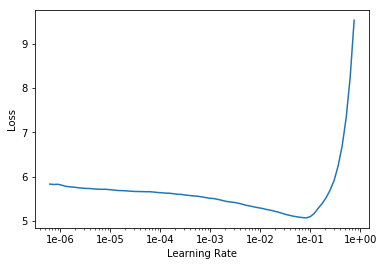

In [30]:
learn.recorder.plot()

In [31]:
learn.freeze()

In [32]:
learn.fit_one_cycle(1, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,4.339707,4.200323,0.340883


In [33]:
learn.save('fit_head', with_opt=True)

In [34]:
learn.load('fit_head', with_opt=True);

In [35]:
learn.unfreeze()

In [36]:
learn.fit_one_cycle(5, 1e-3, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,3.865397,4.084429,0.353182
2,3.720040,3.965928,0.368122
3,3.494669,3.916242,0.376784
4,3.302527,3.903032,0.379614
5,3.247153,3.912802,0.379894


In [37]:
learn.save('fine_tuned', with_opt=True)

In [38]:
learn.load('fine_tuned', with_opt=True);

In [39]:
learn.predict('ਜੋ ਉਹਨਾਂ ਦੇ ਰੱਬਾਂ ਨੂੰ ਪ੍ਰਸਤੁਤ ਕਰਦੇ',n_words=10)

'ਜੋ ਉਹਨਾਂ ਦੇ ਰੱਬਾਂ ਨੂੰ ਪ੍ਰਸਤੁਤ ਕਰਦੇ s ▁ਨਹੀਂ 0 ▁ਪਰ ਨੀਤੀ ▁ਸਮਝੌਤਾ m es da ▁'

In [40]:
learn.save_encoder('fine_tuned_enc')

In [41]:
data_clas = TextClasDataBunch.from_csv(path=path, csv_name='Punjabi_Binary_Classification.csv', valid_pct=0.3, tokenizer=tokenizer, vocab=panjabi_vocab, text_cols=[0], label_cols=label_cols)

In [42]:
data_clas.show_batch()

text,target
"▁x x bo s ▁ਅਲੀਗੜ੍ਹ ▁ਦੇ ▁ਸਾਧੂਆਂ ▁ਦਾ ▁ਕਤਲ ▁ਅਤੇ ▁ਮੁਸਲਮਾਨਾਂ ▁ਦੇ ▁ਐਨ ਕਾਉਂਟ ਰ ▁ਦਾ ▁ਸੱਚ : ▁b b c ▁i n v e st i g a ti o n ▁ਪ੍ਰਿਯੰ ਕਾ ▁ਦੂ ਬੇ ▁ਬੀਬੀਸੀ ▁ਪੱਤਰਕਾਰ , ▁ਉੱਤਰ ▁ਪ੍ਰਦੇਸ਼ ▁ਤੋਂ ▁ਵਾਪਸ ▁ਆਉਣ ▁' ਤੇ ▁30 ▁ਅਕਤੂਬਰ ▁2018 ▁ਈਮੇਲ ▁ਸਾਂਝਾ ▁ਕਰੋ ▁ਈਮੇਲ ▁ਈਮੇਲ ▁ਲਿੰਕ ▁ਨੂੰ ▁ਕਾਪੀ ▁ਕਰੋ ▁http s : ▁/ ▁/ ▁w ww .",False
"▁x x bo s ▁ਉੱਤਰੀ ▁ਕੋਰੀਆ ▁ਤੋਂ ▁ਭੱਜ ੀਆਂ , ▁ਚੀਨ ▁' ਚ ▁ਸੈਕਸ ▁ਸਕ ੈਂਡ ਲ ▁' ਚ ▁ਫਸ ੀਆਂ ▁ਕੁੜੀਆਂ ▁ਕਿਵੇਂ ▁ਬਚ ▁ਨਿਕਲ ੀਆਂ ▁? ▁ਸੁ - ਮਿਨ ▁ਵੈ ਂਗ ▁ਪੱਤਰਕਾਰ , ▁ਬੀਬੀਸੀ ▁21 ▁ਜਨਵਰੀ ▁ 2019 ▁ਈਮੇਲ ▁ਸਾਂਝਾ ▁ਕਰੋ ▁ਈਮੇਲ ▁ਈਮੇਲ ▁ਲਿੰਕ ▁ਨੂੰ ▁ਕਾਪੀ ▁ਕਰੋ ▁http s : ▁/ ▁/ ▁w ww . bb c . com ▁/ ▁ punjabi ▁/ ▁in tern ational - 46 93",False
"▁x x bo s ▁ਕਿਸਾਨਾਂ ▁ਦੀਆਂ ▁ਖੁਦਕੁਸ਼ੀ ਆਂ ▁ਤੇਲੰਗਾਨਾ ▁' ਚ ▁ਰੁਕ ▁ਸਕਦੀਆਂ ▁ਤਾਂ ▁ਪੰਜਾਬ ▁' ਚ ▁ਕਿਉਂ ▁ਨਹੀਂ ▁: ▁b b c ▁s p e c i al ▁ਪ੍ਰਿ ਅੰਕ ਾ ▁ਦੂ ਬੇ ▁ਬੀਬੀਸੀ ▁ਪੱਤਰਕਾਰ , ▁ਤੇਲੰਗਾਨਾ ▁ਤੋਂ ▁ਵਾਪਸ ▁ਆ ▁ਕੇ ▁3 ▁ਸਤੰਬਰ ▁2018 ▁ਈਮੇਲ ▁ਸਾਂਝਾ ▁ਕਰੋ ▁ਈਮੇਲ ▁ਈਮੇਲ ▁ਲਿੰਕ ▁ਨੂੰ ▁ਕਾਪੀ ▁ਕਰੋ ▁http s : ▁/ ▁/ ▁w ww . bb c . com ▁/",False
▁x x bo s ▁ਦਿ ▁ਐਕਸੀਡੈਂਟ ਲ ▁ਪ੍ਰਾਈਮ ▁ਮਿਨਿਸਟਰ : ▁ ਮਨਮੋਹਨ ▁ਸਿੰਘ ▁ਦੇ ▁ਸਲਾਹਕਾਰ ▁ਨੇ ▁ਅਸਲ ▁' ਚ ▁ਉਨ੍ਹਾਂ ▁ਤੇ ▁ਸੋਨੀਆ ▁ਗਾਂਧੀ ▁ਬਾਰੇ ▁ਆਪਣੀ ▁ਕਿਤਾਬ ▁' ਚ ▁ਕੀ ▁ਲਿਖਿਆ ▁ਰੇ ਹਾਨ ▁ਫ਼ਜ਼ਲ ▁ਬੀਬੀਸੀ ▁ਪੱਤਰਕਾਰ ▁8 ▁ਜਨਵਰੀ ▁ 2019 ▁ਈਮੇਲ ▁ਸਾਂਝਾ ▁ਕਰੋ ▁ਈਮੇਲ ▁ਈਮੇਲ ▁ਲਿੰਕ ▁ਨੂੰ ▁ਕਾਪੀ ▁ਕਰੋ ▁http s : ▁/ ▁/ ▁w ww . bb c . com ▁/ ▁ punjabi ▁/ ▁ india -4 67 86 362,False
"▁x x bo s ▁ਬੁਲੰਦ ਸ਼ਹਿਰ ▁ਹਿੰਸਾ : ▁ਕੀ ▁ਪੁਲਿਸ ▁’ ਤੇ ▁ਹੈ ▁ਯੋਗ ੀ ▁ਸਰਕਾਰ ▁ਦਾ ▁ਦਬਾਅ ? ▁ਪੜ੍ਹ ੋ ▁ਗਰਾਊਂਡ ▁ਰਿਪੋਰਟ ▁ਨਿਤ ਿਨ ▁ਸ਼੍ਰੀਵਾਸਤਵ ▁ਬੀਬੀਸੀ ▁ਪੱਤਰਕਾਰ , ▁ਬੁਲੰਦ ਸ਼ਹਿਰ ▁ਤੋਂ ▁21 ▁ਦਸੰਬਰ ▁2018 ▁ਈਮੇਲ ▁ਸਾਂਝਾ ▁ਕਰੋ ▁ਈਮੇਲ ▁ਈਮੇਲ ▁ਲਿੰਕ ▁ਨੂੰ ▁ਕਾਪੀ ▁ਕਰੋ ▁http s : ▁/ ▁/ ▁w ww . bb c . com ▁/ ▁ punjabi ▁/ ▁ india -4 66 40 6 11 ▁ਸਾਂਝਾ ▁ਕਰਨ ▁ਬਾਰੇ",False


In [43]:
valid_labels = []
for item in data_clas.valid_ds:
    valid_labels.append(item[1])

In [44]:
counter = defaultdict(int)
for label in valid_labels:
    counter[label.data] = counter[label.data] + 1
counter

defaultdict(int, {0: 200, 1: 36})

In [46]:
print('Percentage false in validation data: ', counter[0]/(counter[0]+counter[1]))
print('Percentage true in validation data: ', counter[1]/(counter[0]+counter[1]))

Percentage false in validation data:  0.847457627118644
Percentage true in validation data:  0.15254237288135594


In [47]:
data_clas.sanity_check()

In [48]:
learn = text_classifier_learner(data_clas, drop_mult=0.5)

In [49]:
learn.load_encoder('fine_tuned_enc')

In [50]:
learn.freeze()

In [51]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


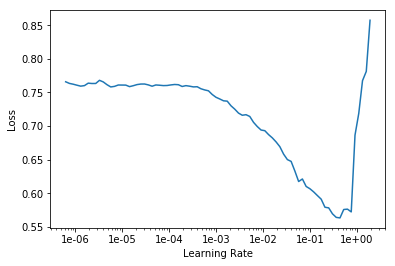

In [52]:
learn.recorder.plot()

In [53]:
learn.loss_func.func

CrossEntropyLoss()

In [54]:
kappa = KappaScore()

In [55]:
learn.metrics = [accuracy, kappa]

In [56]:
learn.fit_one_cycle(1, 1e-1, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,kappa_score
1,0.433516,0.361092,0.847458,0.000000


In [ ]:
# 84% is the accuracy which we can get by just outputting all 0s

In [57]:
learn.save('first-full')

In [58]:
learn.load('first-full');

In [59]:
learn.freeze_to(-2)
learn.fit_one_cycle(1, slice(1e-2/(2.6**4),1e-2), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,kappa_score
1,0.252704,0.309044,0.851695,0.046189


In [60]:
learn.unfreeze()
learn.fit_one_cycle(5, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,kappa_score
1,0.223750,0.270364,0.894068,0.477136
2,0.219014,0.268611,0.902542,0.569070
3,0.211125,0.273990,0.898305,0.587893
4,0.196499,0.272024,0.911017,0.626019
5,0.194661,0.282034,0.902542,0.600295


In [ ]:
# Todos: Clean the input text a little